In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('../data/emdat.xlsx')

In [61]:
types_to_consider = [
    'Drought', 
    'Earthquake', 
    'Extreme temperature', 
    'Flood', 
    'Storm', 
    'Wildfire',
    'Volcanic activity',
    'Mass Movement (Dry)',
    'Mass Movement (Wet)'
]

In [72]:

data = (df.query('`Disaster Type` in @types_to_consider')
          .groupby(['Disaster Type', 'ISO', 'Start Year'])
          .size()
          .unstack('Disaster Type')
          .fillna(0)
          .reset_index(d))
data

Disaster Type,ISO,Start Year,Drought,Earthquake,Extreme temperature,Flood,Storm,Volcanic activity,Wildfire
0,AFG,1954,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,AFG,1956,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,AFG,1963,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,AFG,1969,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,AFG,1971,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
4359,ZWE,2017,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4360,ZWE,2019,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4361,ZWE,2021,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4362,ZWE,2022,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [57]:
df[['Disaster Type', 'Disaster Subtype']].drop_duplicates().sort_values(by='Disaster Type')

,Disaster Type,Disaster Subtype
9990,Animal incident,Animal incident
2,Drought,Drought
1,Earthquake,Ground movement
5,Earthquake,Tsunami
4,Epidemic,Infectious disease (General)
37,Epidemic,Bacterial disease
121,Epidemic,Parasitic disease
101,Epidemic,Viral disease
1842,Extreme temperature,Severe winter conditions
659,Extreme temperature,Cold wave


In [54]:
sorted(.unique())

['Animal incident',
 'Ash fall',
 'Avalanche (dry)',
 'Avalanche (wet)',
 'Bacterial disease',
 'Blizzard/Winter storm',
 'Coastal flood',
 'Cold wave',
 'Collision',
 'Derecho',
 'Drought',
 'Extra-tropical storm',
 'Flash flood',
 'Flood (General)',
 'Fog',
 'Forest fire',
 'Glacial lake outburst flood',
 'Grasshopper infestation',
 'Ground movement',
 'Hail',
 'Heat wave',
 'Infectious disease (General)',
 'Infestation (General)',
 'Land fire (Brush, Bush, Pasture)',
 'Landslide (dry)',
 'Landslide (wet)',
 'Lava flow',
 'Lightning/Thunderstorms',
 'Locust infestation',
 'Mudslide',
 'Parasitic disease',
 'Pyroclastic flow',
 'Riverine flood',
 'Rockfall (dry)',
 'Rockfall (wet)',
 'Sand/Dust storm',
 'Severe weather',
 'Severe winter conditions',
 'Storm (General)',
 'Storm surge',
 'Sudden Subsidence (dry)',
 'Sudden Subsidence (wet)',
 'Tornado',
 'Tropical cyclone',
 'Tsunami',
 'Viral disease',
 'Volcanic activity (General)',
 'Wildfire (General)',
 'Worms infestation']

<Axes: xlabel='Start Year'>

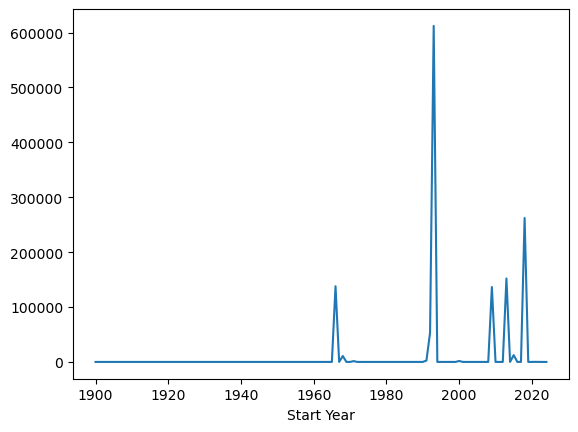

In [47]:
(df
     .groupby(['Disaster Type', 'ISO', 'Start Year'])
     ['Total Damage, Adjusted (\'000 US$)']
     .sum()
     .unstack('ISO')
     .LAO
     .unstack(0)
     .sum(axis=1)
     .plot(legend=False))

In [7]:
len(df.ISO.unique())

179